# Mapas de Poincaré 

### Lucas Freire

Os mapas de Poincaré (ou mapa de primeiro retorno ou secção de Poincaré) são ferramentas úteis para o estudo de sistemas dinâmicos. Intuitivamente, vamo analisar a evolução dos estados como algo parecido com uma órbita.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/WBPLnq1/poincar-1.png" alt="Fonte: Lynch, Tutorial..." border="0"></a>



De uma maneira mais formal, dado um sistema n-dimensional, trata-se de construir uma superfície S de dimensões n-1 de tal maneira que seja sempre transversa (ou não tangente) à trajetória de evolução do sistema.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/BVdgDgS/Fonte-Stuart-and-Humphries.png" alt="Fonte: Stuart and Humphries" border="0"></a>

O mapa de Poincaré é portante uma função da seguinte forma:

$$
\mathbf{x}_{i+1}=P\left(\mathbf{x}_{i}\right)
$$
No estudo quanto a estabilidade do sistema, estamos interessados em identificar o ponto fixo dado por: $$
P\left(\mathbf{x}^{*}\right)=\mathbf{x}^{*}
$$


Elegante, intuitivo, visual, mas Stuart e Humphries que em geral é bastante difícil encontrar a função P. Os autores apresentam dois exemplos com solução analítica, mas vamos antes conferir os exemplos de Stephen Lynch abaixo por serem mais simples.


Vamos considerar o caso bidimensional sendo a secção de Poincaré definida por uma reta sigma, temos: 

<a href="https://ibb.co/CV6ftPB"><img src="https://i.ibb.co/BTG9PnL/poincar-3.png" alt="Exemplo 2" border="0"></a>

Nosso sistema será dado por: 

$$
\dot{x}=-y-x \sqrt{x^{2}+y^{2}}, \quad \dot{y}=x-y \sqrt{x^{2}+y^{2}}
$$

E convertendo para coordenadas polares vamos computar a sequência de retornos à secção de Poincaré com $r_{0}=1$: 

$$
\dot{r}=-r^{2}, \quad \dot{\theta}=1
$$






r0 = 1.0
r1 = 0.13730247618333372
r2 = 0.07371163982459514
r3 = 0.05037894644425656
r4 = 0.038266178113978165
r5 = 0.030849052029229055
r6 = 0.025840414374083687
r7 = 0.022231002965186247
r8 = 0.01950634323887854


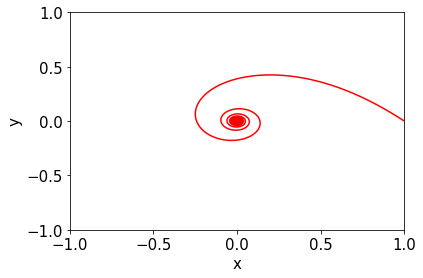

In [ ]:
# Program 09a: Poincare first return map.
# See Figure 9.2.

import matplotlib.pyplot as plt
from sympy import sqrt
import numpy as np
from scipy.integrate import odeint

xmin, xmax = -1, 1
ymin, ymax = -1, 1

def dx_dt(x, t):
    return [-x[1] - x[0] * sqrt(x[0]**2 + x[1]**2),
            x[0] - x[1] * sqrt(x[0]**2 + x[1]**2)]

# Phase portrait
t = np.linspace(0, 32*np.pi, 10000) # número de órbitas multiplica pi aqui 
xs = odeint(dx_dt, [1, 0], t)
plt.plot(xs[:, 0], xs[:, 1], 'r-')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);

# First eight returns on x-axis.
t = np.linspace(0, 9*2*np.pi, 900000)
xs = odeint(dx_dt, [1, 0], t)

for i in range(9):
    print('r{} = {}'.format(i, xs[100000*i, 0]))

plt.show()

No exemplo acima, foram usadas as condições iniciais r(0) = 1 e $\quad {\theta}=1$:$$
r(t)=\frac{1}{1+t}, \quad \theta(t)=t
$$


$$
r(t)=\frac{1}{1+\theta(t)}
$$

O que leva a seguinte expressão para o mapa de Poincaré:

$$
r_{n}=\frac{1}{1+2 n \pi}
$$

$$
r_{n+1}=\mathbf{P}\left(r_{n}\right)=\frac{r_{n}}{1+2 \pi r_{n}}
$$

Segundo exemplo é: 
$$
\dot{x}=-y+x\left(1-\sqrt{x^{2}+y^{2}}\right), \quad \dot{y}=x+y\left(1-\sqrt{x^{2}+y^{2}}\right)
$$

Convertido em coordenadas polares:

$$
\dot{r}=r(1-r), \quad \dot{\theta}=1
$$

Resolvido por separação de variáveis:

$$
r(t)=\frac{1}{1+C e^{-t}}, \quad \theta(t)=t+\theta_{0}, $\theta=\omega t$
$$

Com $r_{0} = 2$, a função de retorno pode ser expressa como:

$$
r_{n}=\frac{1}{1-\frac{1}{2} e^{-2 n \pi}}
$$

<a href="https://ibb.co/n3mC63K"><img src="https://i.ibb.co/PTjQFTV/poicare4.png" alt="poicare4" border="0"></a>


Abaixo são apresentados diferentes estados para um experimento uma peça de metal fica entre dois imãs da seguinte maneira:


<a href="https://ibb.co/Wctcvtz"><img src="https://i.ibb.co/MR6Rk61/poicare6.png" alt="poicare6" border="0"></a>

$$
\dot{x}=y, \quad \dot{y}=-\beta x-k y-\alpha x^{3}+\Gamma \cos (\theta), \quad \dot{\theta}=\omega
$$



<a href="https://ibb.co/KWTGB9y"><img src="https://i.ibb.co/sq8PcF3/poincar-5.png" alt="poincar-5" border="0"></a>

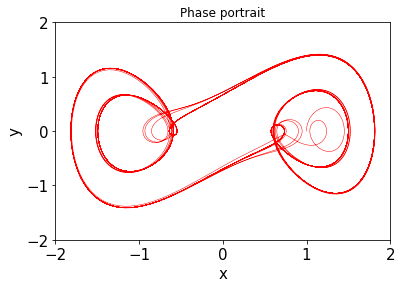

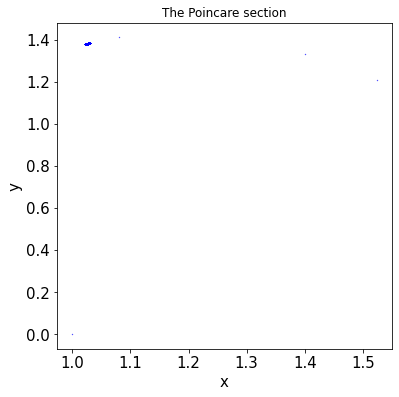

In [ ]:
# Program 09c: Phase portrait and Poincare section of a nonautonomous ODE.
# See Figure 9.11(b).

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

xmin, xmax = -2, 2
ymin, ymax = -2, 2

k = 0.3
omega = 0.25
gamma = 0.8

def dx_dt(x, t):
    return [x[1], x[0] - k*x[1] - x[0]**3 + gamma*np.cos(omega*t)]

# Phase portrait
t = np.linspace(0, 500, 10000)
xs = odeint(dx_dt, [1,0], t)
plt.plot(xs[:, 0], xs[:, 1], 'r-', lw=0.5)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.title('Phase portrait')

# The Poincare section.
fig, ax = plt.subplots(figsize=(6, 6))
t = np.linspace(0, 4000 * (2*np.pi) / omega, 16000000)
xs = odeint(dx_dt, [1, 0], t)

x = [xs[4000*i, 0] for i in range(4000)]
y = [xs[4000*i, 1] for i in range(4000)]

ax.scatter(x, y, color='blue', s=0.1)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('The Poincare section')

plt.show()


Voltando Strogatz para uma abordagem mais formal da análise de estabilidade em órbitas periódicas.

Vamos considerar  $\dot{\mathbf{x}}=\mathbf{f}(\mathbf{x})$ e $\mathbf{x}^{*}+\mathbf{v}_{0}$ uma pertubação infinitesimal.

Então temos: 

\begin{aligned}
\mathbf{x}^{*}+\mathbf{v}_{1} &=P\left(\mathbf{x}^{*}+\mathbf{v}_{0}\right) \\
&=P\left(\mathbf{x}^{*}\right)+\left[D P\left(\mathbf{x}^{*}\right)\right] \mathbf{v}_{a}+O\left(\mid \mathbf{v}_{0} \|^{2}\right)
\end{aligned}

Aqui $D P\left(\mathbf{x}^{*}\right)$ tem a forma $(n-1) \times(n-1)$ e é chamada forma linearizada do mapa de POincaré em torno de $\mathbf{x}^{*}=P\left(\mathbf{x}^{*}\right)$

A órbita é estável se todos os autovalores forem menores que 1. Podemos escrever os vetores como multiplo de um escalar e um autovetor e:
$$\mathbf{v}_{0}=\sum_{j=1}^{n-1} v_{j} \mathbf{e}_{j}$$


$$\mathbf{v}_{1}=\left(D P\left(\mathbf{x}^{*}\right)\right) \sum_{j=1}^{n-1} v_{j} \mathbf{e}_{j}=\sum_{j=1}^{n-1} v_{j} \lambda_{j} \mathbf{e}_{j}$$

$$\mathbf{v}_{k}=\sum_{j=1}^{n-1} v_{j}\left(\lambda_{j}\right)^{k} \mathbf{e}_{j}$$


Exemplo de implementação em python para óbitas planetárias 

https://rebound.readthedocs.io/en/latest/ipython/PoincareMap.html


Bibliografia

<ol>
<li>
Stuart, Andrew, and Anthony R. Humphries. Dynamical systems and numerical analysis. Vol. 2. Cambridge University Press, 1998
</li>
<li>
Lynch, Stephen. Dynamical Systems with Applications Using Python. Birkhäuser, 2018.
</li>
<li>
Tutorial 2: Tools from Nonlinear Dynamics 
http://www2.eng.cam.ac.uk/~mpj1001/papers/ARFM_Tutorial_2_text.pdf

<li> Strogatz, Steven H. "Nonlinear dynamics and chaos: with applications to physics." Biology, Chemistry and Engineering (1994) </li>
</li>
</ol>

